In [327]:
#Library Imports
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error

#######딥러닝 라이브러리##########
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape, GRU, RNN

tf.keras.backend.set_floatx('float64')

In [328]:
# 맵플롯립 시각화 및 한국어 설정 (맷플롯립 시각화 시)
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(그래프가 화면에 뜨지 않을 때)
%matplotlib inline

# 그래프(figure)에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정(나눔고딕체)
plt.rc('font', family='NanumGothic')

# 조용하 강사님이 올려주신 코드(한글화-matplotlib)
!pip install koreanize-matplotlib
import koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [329]:
pd.set_option('display.max_rows',None) # 전체 보이기 하는 코드

In [352]:
# 경고 메세지 무시하기
import warnings
warnings.filterwarnings(action='ignore')

In [403]:
part1=pd.read_csv('61번_파트1.csv', encoding = 'cp949')
part2=pd.read_csv('61번_파트2.csv', encoding = 'cp949')
main=pd.read_csv('61번_MAIN.csv', encoding = 'cp949')

In [404]:
list = [part1, part2, main]

def am_pm(df):
    for i in range(11):
        df.loc[i * 24, '일시'] = df.loc[i * 24, '일시'] + ' 오전 0:00:00'
        # Replace '일시' with the actual column name in your DataFrame
    df[['ymd', 'p', 'hms']] = df['일시'].str.split(' ', n=2, expand=True)

    am=df[(df['p']=='오전')|(df['hms']=='12:00:00')]
    am['일시']=am['ymd']+" "+am['hms']

    pm=df[(df['p']=='오후')&(df['hms']!='12:00:00')]

    # Replace 'time_column' with the actual column name in your DataFrame
    pm['hms'] = pd.to_datetime(pm['hms'], format='%H:%M:%S')  # Convert to datetime
    
    # Add 12 hours to the datetime values
    pm['hms']= pm['hms']+ pd.to_timedelta(12, unit='h')
    
    # If you want to preserve only the time part and remove the date:
    pm['hms'] = pm['hms'].dt.strftime('%H:%M:%S')

    pm['일시']=pm['ymd']+' '+pm['hms']

    df=pd.concat([am,pm])
    df['일시']=pd.to_datetime(df['일시'])
    df=df.sort_values(by='일시')
    return df

part1=am_pm(part1)
part2=am_pm(part2)
main=am_pm(main)

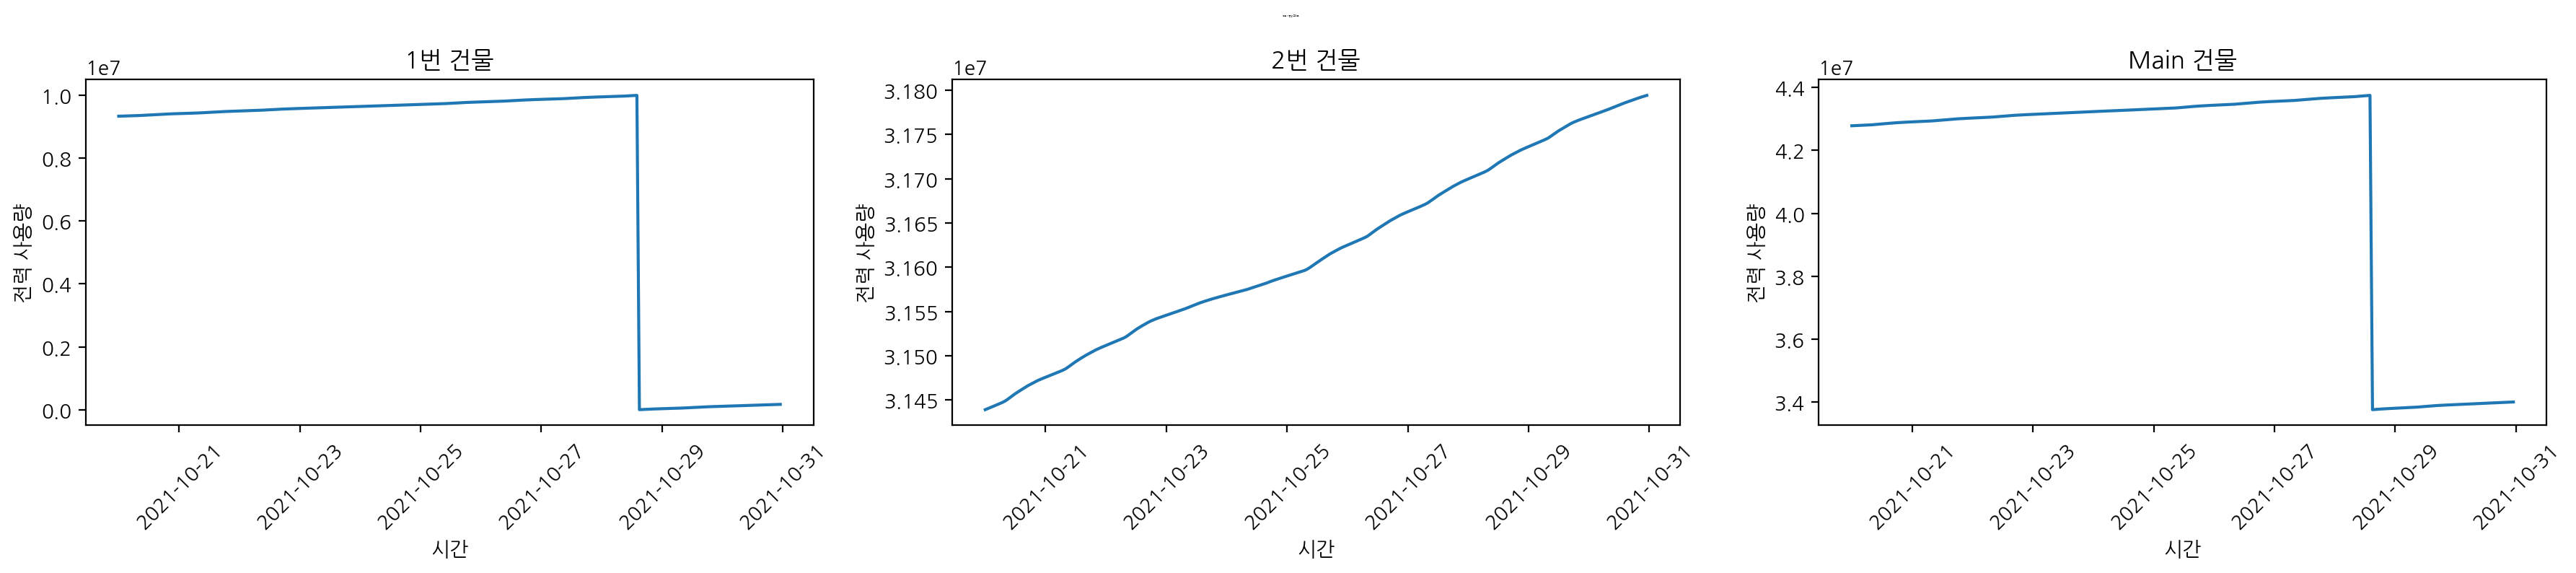

In [421]:
import matplotlib.pyplot as plt

# 그래프의 크기 및 서브플롯 설정
plt.figure(figsize=(18, 4))
plt.suptitle('전력 사용량 그래프', fontsize=1)

titles = ["1번 건물", "2번 건물", "Main 건물"]  # 제목 목록

# 세 개의 서브플롯을 그리기
for i, df in enumerate(list, 1):
    plt.subplot(1, 3, i)
    plt.plot(df['일시'], df['전력사용량'])
    plt.title(titles[i-1])  # i번째 그래프에 해당하는 제목 추가
    plt.xlabel("시간")
    plt.ylabel("전력 사용량")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

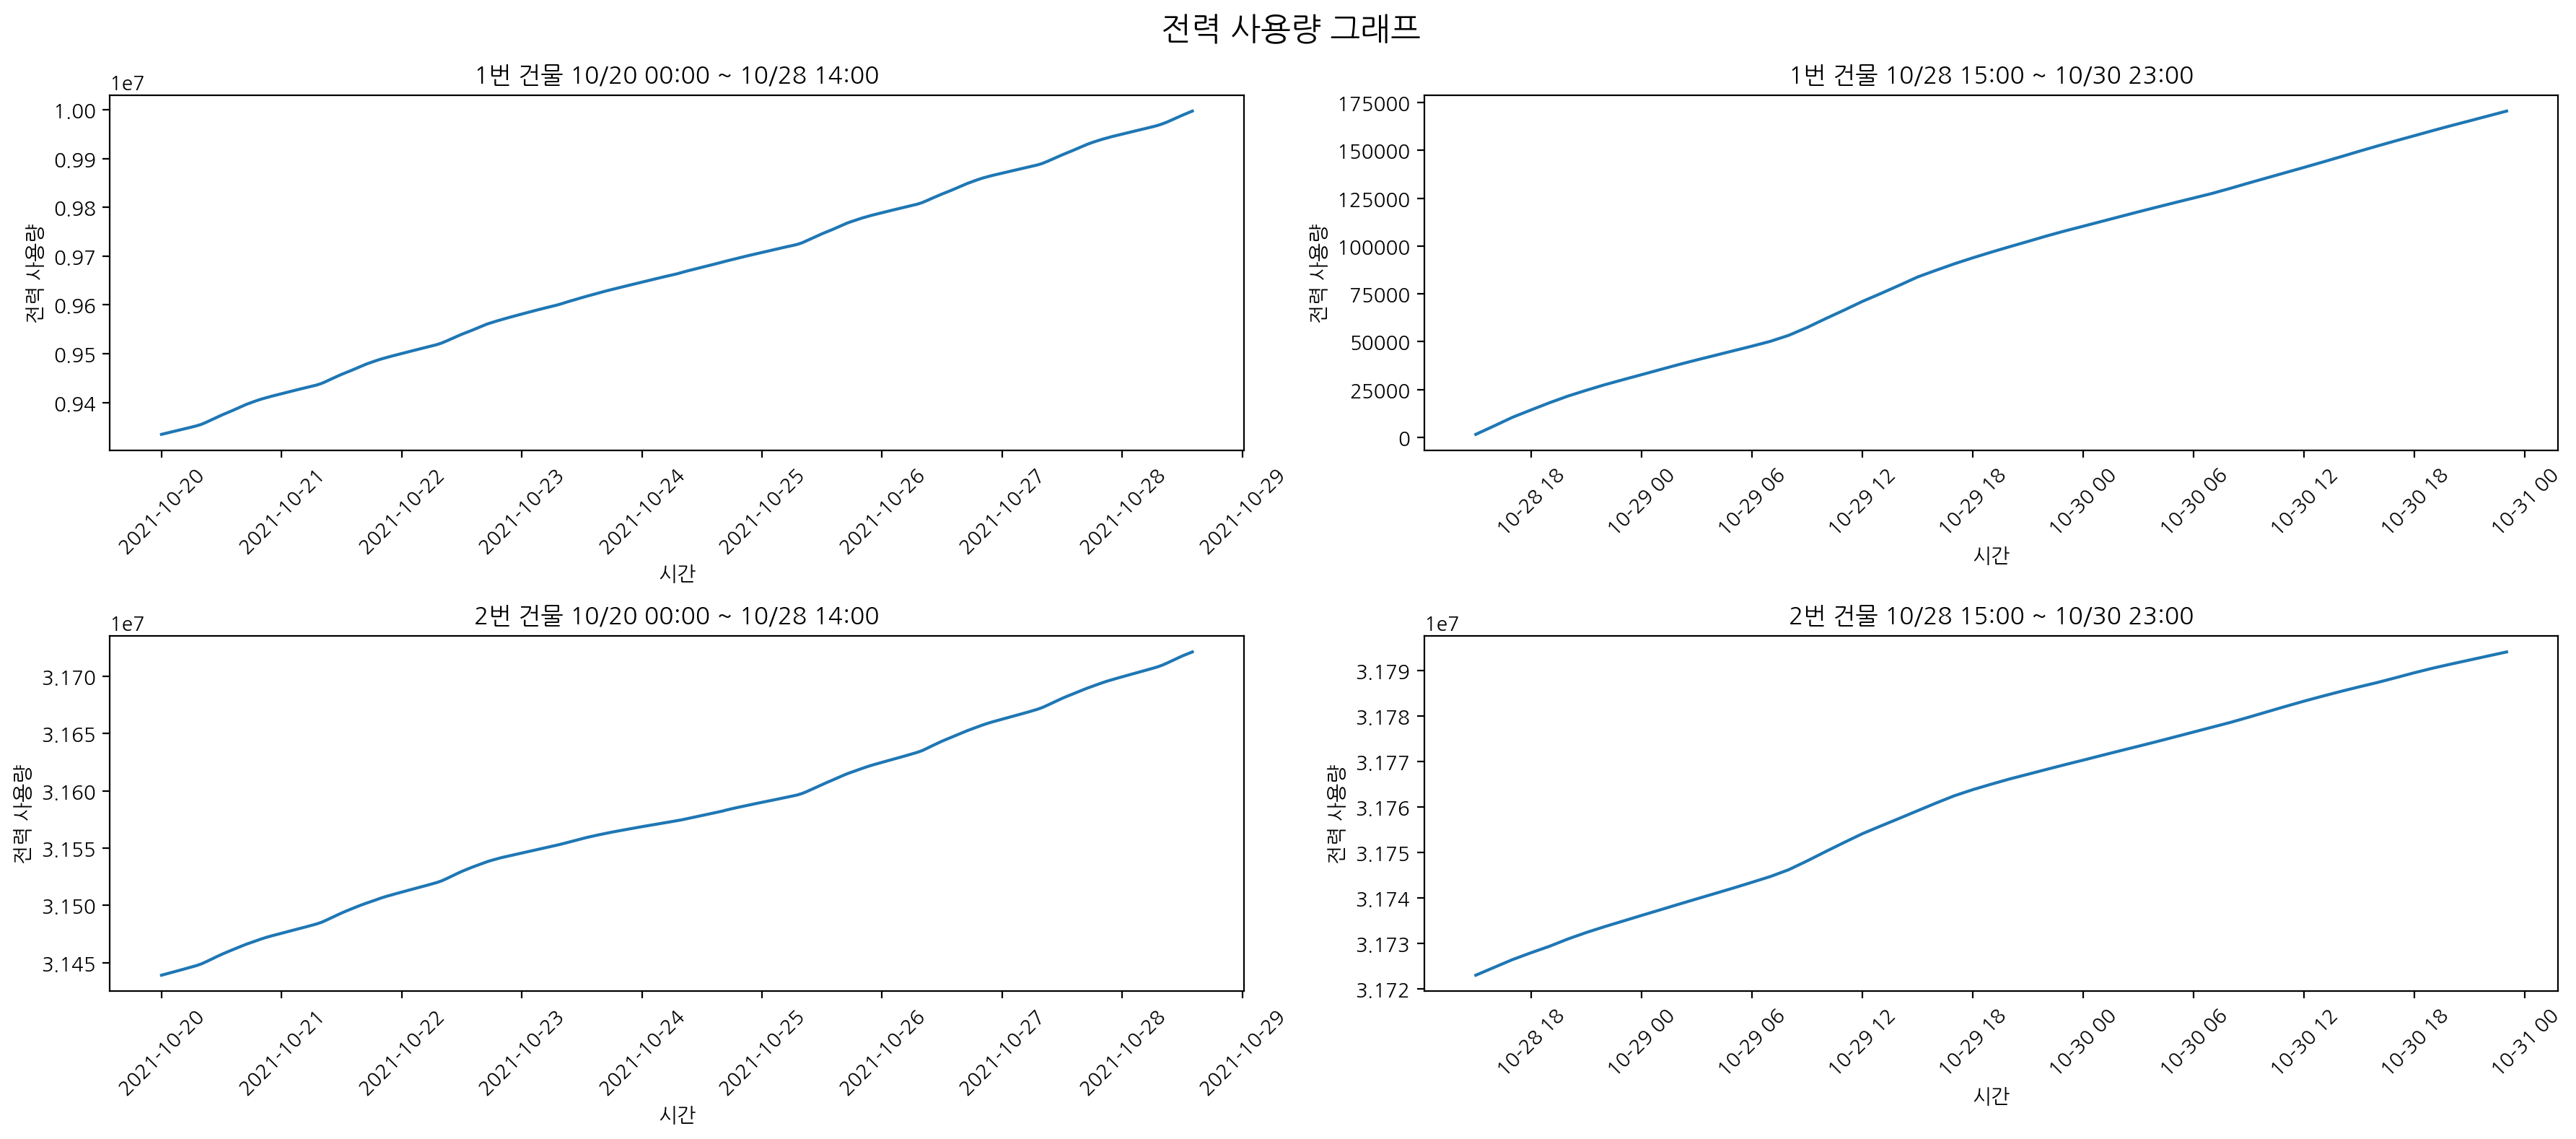

In [406]:
import matplotlib.pyplot as plt

# 설정
plt.figure(figsize=(18, 8))
plt.suptitle('전력 사용량 그래프', fontsize=16)

# part1 그래프
plt.subplot(2, 2, 1)
plt.plot(part1['일시'][:207], part1['전력사용량'][:207])
plt.xlabel("시간")
plt.ylabel("전력 사용량")
plt.title('1번 건물 10/20 00:00 ~ 10/28 14:00')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.plot(part1['일시'][207:], part1['전력사용량'][207:])
plt.xlabel("시간")
plt.ylabel("전력 사용량")
plt.title('1번 건물 10/28 15:00 ~ 10/30 23:00')
plt.xticks(rotation=45)

# part2 그래프
plt.subplot(2, 2, 3)
plt.plot(part2['일시'][:207], part2['전력사용량'][:207])
plt.xlabel("시간")
plt.ylabel("전력 사용량")
plt.title('2번 건물 10/20 00:00 ~ 10/28 14:00')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.plot(part2['일시'][207:], part2['전력사용량'][207:])
plt.xlabel("시간")
plt.ylabel("전력 사용량")
plt.title('2번 건물 10/28 15:00 ~ 10/30 23:00')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [407]:
list = [part1, part2, main]

In [408]:
for df in list :
    df['power'] = np.nan

In [409]:
# part1 전처리

for i in range(206) :
    part1['power'][i] = part1['전력사용량'][i+1] - part1['전력사용량'][i]

for i in range(207,263) :
    part1['power'][i] = part1['전력사용량'][i+1] - part1['전력사용량'][i]

for i in range(263) :
    part2['power'][i] = part2['전력사용량'][i+1] - part2['전력사용량'][i]

for i in range(206) :
    main['power'][i] = main['전력사용량'][i+1] - main['전력사용량'][i]

for i in range(207,263) :
    main['power'][i] = main['전력사용량'][i+1] - main['전력사용량'][i]

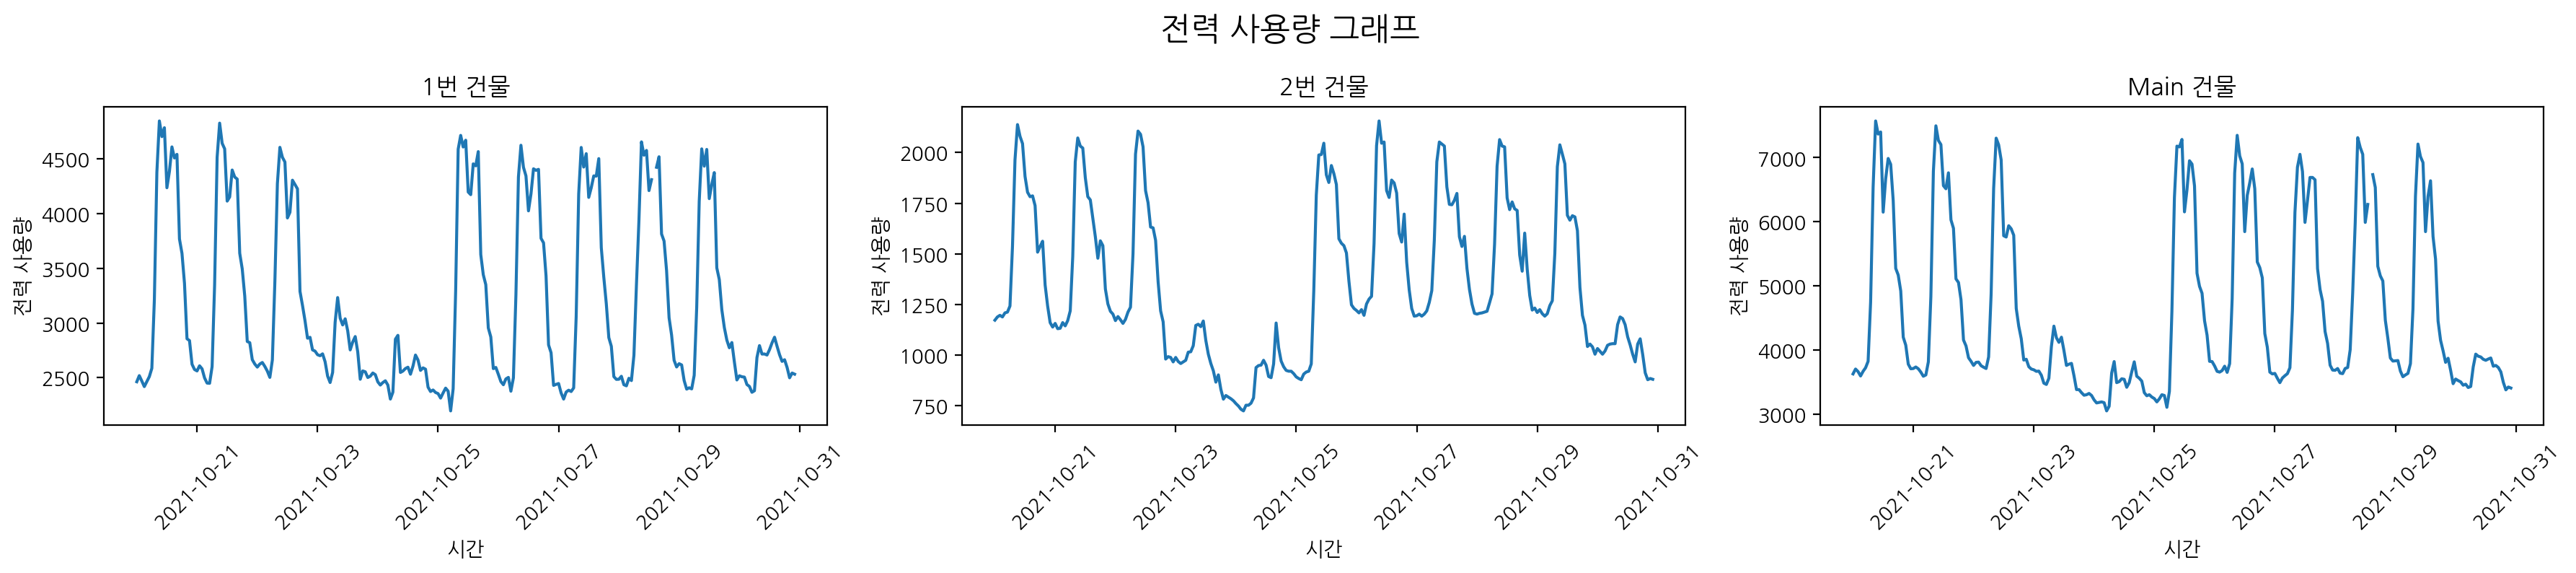

In [410]:
import matplotlib.pyplot as plt

# 그래프의 크기 및 서브플롯 설정
plt.figure(figsize=(18, 4))
plt.suptitle('전력 사용량 그래프', fontsize=16)

titles = ["1번 건물", "2번 건물", "Main 건물"]  # 제목 목록

# 세 개의 서브플롯을 그리기
for i, df in enumerate(list, 1):
    plt.subplot(1, 3, i)
    plt.plot(df['일시'], df['power'])
    plt.title(titles[i-1])  # i번째 그래프에 해당하는 제목 추가
    plt.xlabel("시간")
    plt.ylabel("전력 사용량")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [411]:
# part1의 결측치
part1[part1['power'].isna() == True]

,일시,전력사용량,ymd,p,hms,power
206,2021-10-28 14:00:00,9.997040e+06,2021-10-28,오후,14:00:00,NaN
263,2021-10-30 23:00:00,1.705298e+05,2021-10-30,오후,23:00:00,NaN


In [412]:
# part2의 결측치
part2[part2['power'].isna() == True]

,일시,전력사용량,ymd,p,hms,power
263,2021-10-30 23:00:00,31794032,2021-10-30,오후,23:00:00,NaN


In [413]:
# part3의 결측치
main[main['power'].isna() == True]

,일시,전력사용량,ymd,p,hms,power
206,2021-10-28 14:00:00,43749552,2021-10-28,오후,14:00:00,NaN
263,2021-10-30 23:00:00,34001248,2021-10-30,오후,23:00:00,NaN


In [414]:
# 데이터 전처리

# 선형 보간법
for df in list :
    df['power']=df['power'].interpolate(method='linear')

# 전 주 같은 시간의 값을 대입
part1['power'][263] = part1['power'][95]
main['power'][263] = main['power'][95]


In [415]:
part1['power'][95]

2528.0

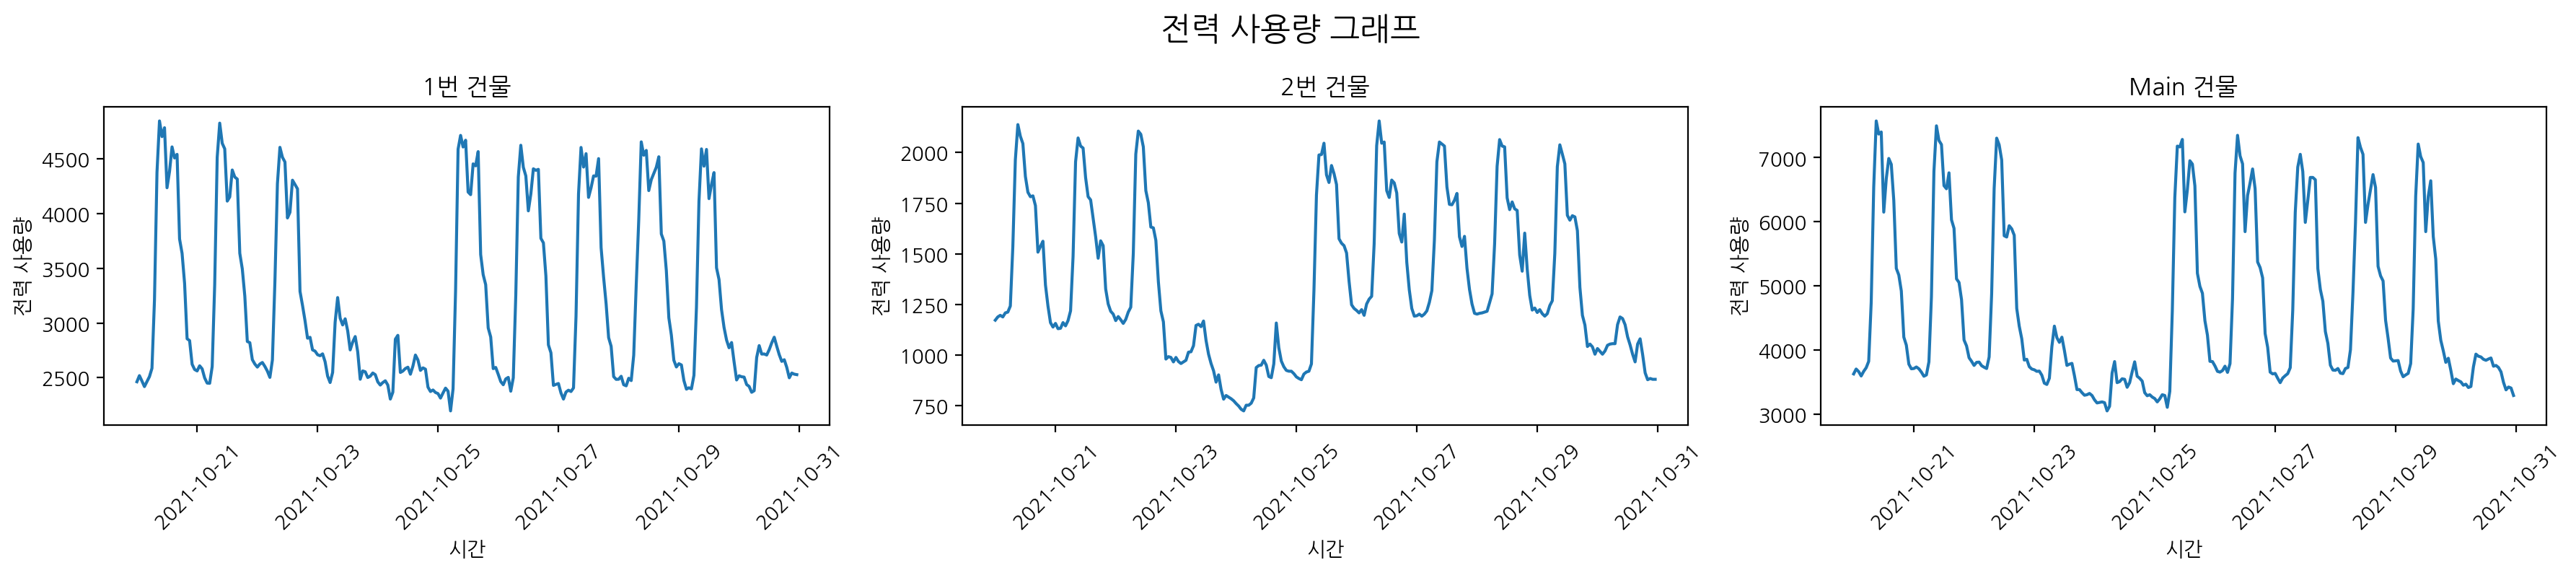

In [416]:
import matplotlib.pyplot as plt

# 그래프의 크기 및 서브플롯 설정
plt.figure(figsize=(18, 4))
plt.suptitle('전력 사용량 그래프', fontsize=16)

titles = ["1번 건물", "2번 건물", "Main 건물"]  # 제목 목록

# 세 개의 서브플롯을 그리기
for i, df in enumerate(list, 1):
    plt.subplot(1, 3, i)
    plt.plot(df['일시'], df['power'])
    plt.title(titles[i-1])  # i번째 그래프에 해당하는 제목 추가
    plt.xlabel("시간")
    plt.ylabel("전력 사용량")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [417]:
for df in list :
    df['hour'] = df['일시'].dt.hour
    df['day_of_week'] = df['일시'].dt.day_name()

In [418]:
part1_hitmap = part1
part2_hitmap = part2
main_hitmap = main

In [419]:
# 월요일부터 시작하도록 순서 정의
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

hitmap = [part1_hitmap, part2_hitmap, main_hitmap]

# day_of_week 열을 순서대로 정렬
for df in list :
    df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)
    df = df.sort_values('day_of_week')

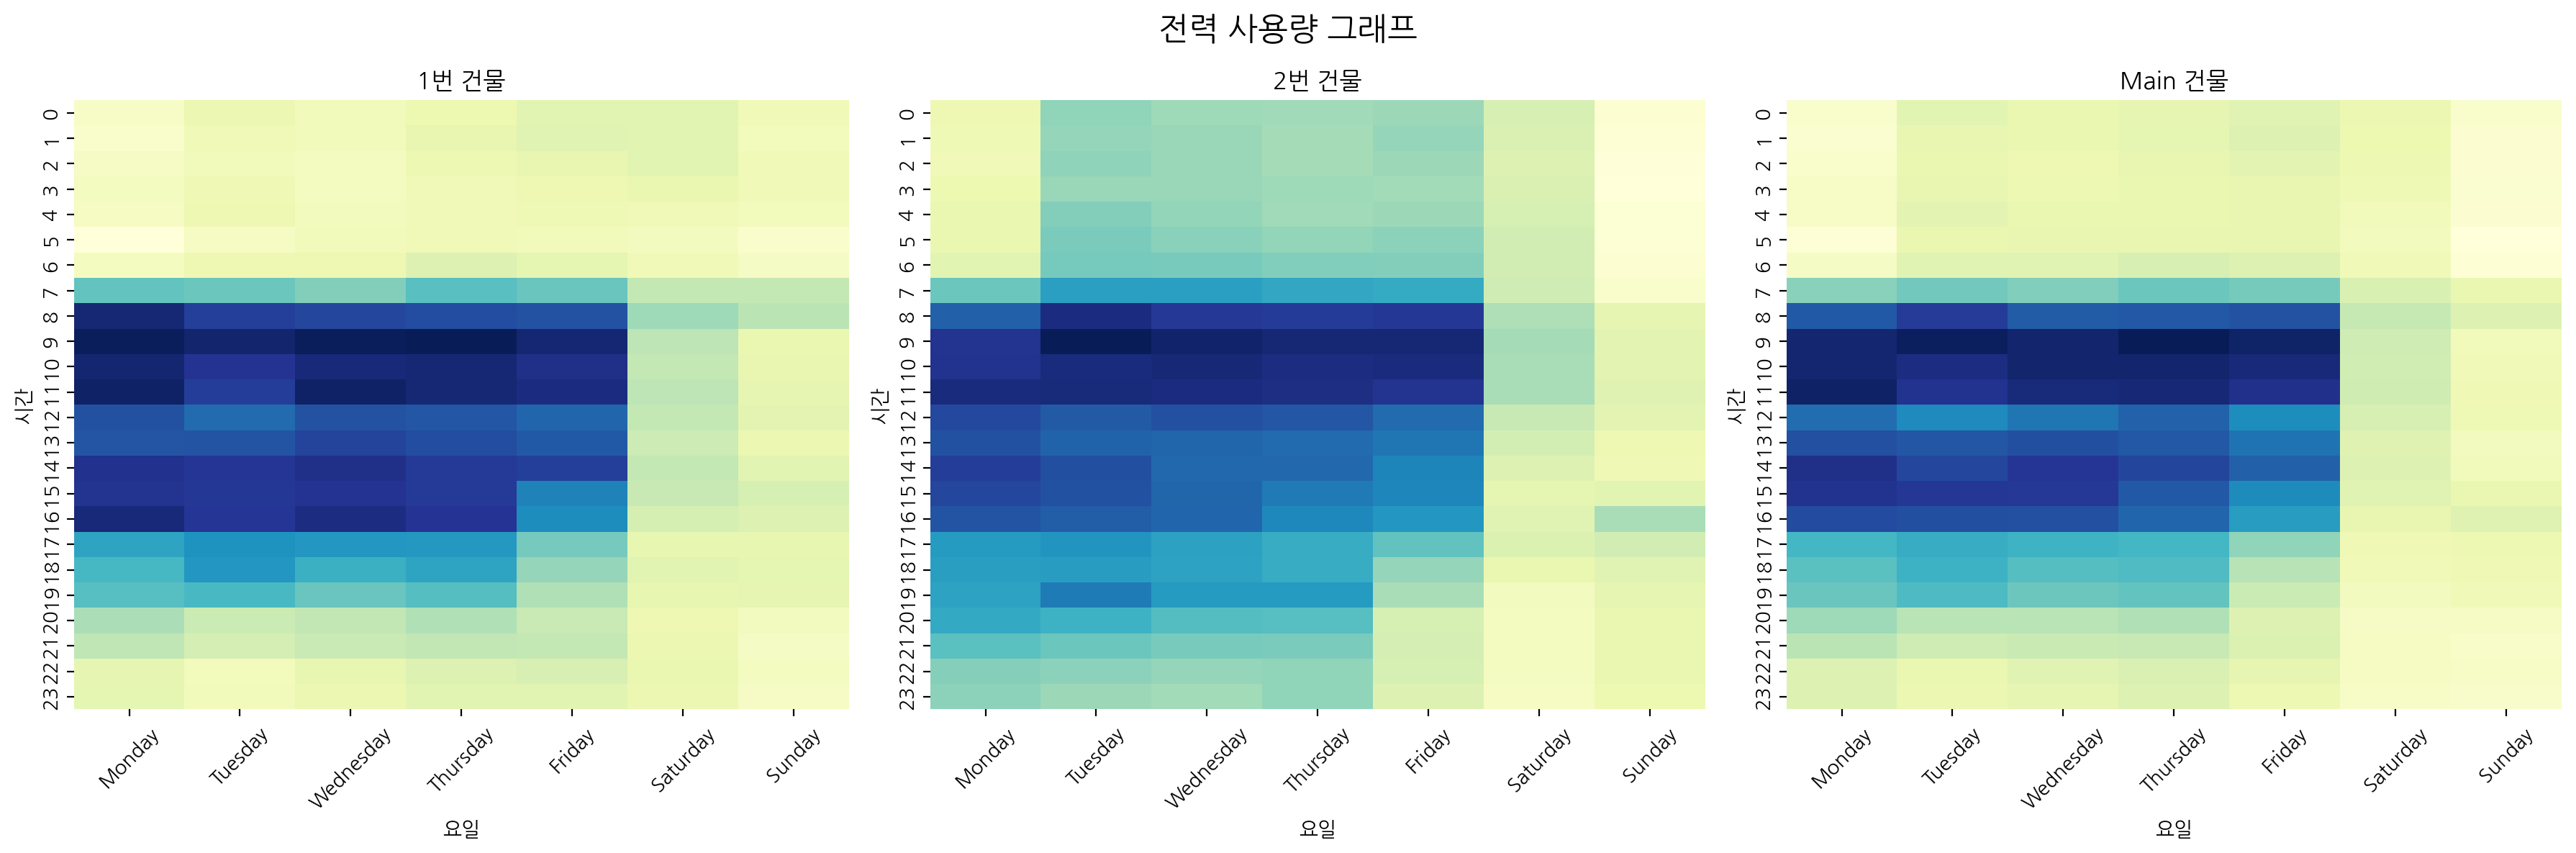

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

hitmap = [part1_hitmap, part2_hitmap, main_hitmap]

# 그래프의 크기 및 서브플롯 설정
plt.figure(figsize=(18, 6))
plt.suptitle('전력 사용량 그래프', fontsize=16)

titles = ["1번 건물", "2번 건물", "Main 건물"]  # 각 그래프에 대한 제목 목록

# 리스트에 있는 데이터프레임들에 대해 그래프를 그립니다.
for i, df in enumerate(hitmap, 1):
    plt.subplot(1, 3, i)
    p = df.groupby(['hour', 'day_of_week'])['power'].median().reset_index()
    p['M'] = p['power']
    p = p.pivot(index='hour', columns='day_of_week', values='M')
    sns.heatmap(p, cmap='YlGnBu', annot=False, cbar=False)
    
    plt.xlabel('요일')  # x 축 레이블
    plt.ylabel('시간')  # y 축 레이블
    plt.xticks(rotation=45)
    
    plt.title(titles[i-1])  # 각 그래프에 해당하는 제목 추가

plt.tight_layout()
plt.show()

